In [0]:
import numpy as np

In [0]:
def softmax(a):
  e_pa = np.exp(a) #Vector
  ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
  return ans

In [0]:
def loss(y_oht,p):
  return -np.mean(y_oht*np.log(p))

def one_hot(y,depth):
  #depth here stands for the number of labels
  m=y.shape[0] #number of examples
  y_oht=np.zeros((m,depth))
  y_oht[np.arange(m),y]=1 #puts 1 at the given class in a row, while the other vaues remain 0
  return y_oht

In [0]:
class NeuralNetwork:

  def __init__(self,input_size,layer,output_size):
    model= {} #Empty Dictionary
    np.random.seed(0)
    model['W1']=np.random.randn(input_size,layer[0])
    model['b1']=np.zeros((1,layer[0]))

    model['W2']=np.random.randn(layer[0],layer[1])
    model['b2']=np.zeros((1,layer[1]))

    model['W3']=np.random.randn(layer[1],output_size)
    model['b3']=np.zeros((1,output_size))

    self.model=model
    self.activation_outputs= None
  
  def forward(self,X): #forward propagation implementation
    
    W1,W2,W3=self.model["W1"],self.model["W2"],self.model["W3"]
    b1,b2,b3=self.model["b1"],self.model["b2"],self.model["b3"]
    #print(W1.shape,b1.shape)# W1=4,3 b1=3,1
    Z1=np.dot(X,W1)+b1
    #print(Z1.shape) 2x3
    a1=np.tanh(Z1)
    #print(a1.shape)2x3
    #print(Z1)
    Z2=np.dot(a1,W2)+b2
    a2=np.tanh(Z2)

    Z3=np.dot(a2,W3)+b3
    #a3=np.tanh(Z3)
    y_=softmax(Z3)
    self.activation_outputs=(a1,a2,y_) #the activation values obtained from each layer
    return y_
  
  def backward(self,x,y,learning_rate):
    
    W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
    b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
    m=x.shape[0] #number of training examples
    a1,a2,y_= self.activation_outputs
    #starting with the last layer
    delta3=y_-y
    dw3 = np.dot(a2.T,delta3)
    db3 = np.sum(delta3,axis=0)

    delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
    dw2 = np.dot(a1.T,delta2)
    db2 = np.sum(delta2,axis=0)

    delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
    dw1 = np.dot(X.T,delta1)
    db1 = np.sum(delta1,axis=0)

    self.model["W1"]  -= learning_rate*dw1
    self.model['b1']  -= learning_rate*db1
        
    self.model["W2"]  -= learning_rate*dw2
    self.model['b2']  -= learning_rate*db2
        
    self.model["W3"]  -= learning_rate*dw3
    self.model['b3']  -= learning_rate*db3
  
  def predict(self,x):
    y_out=self.forward(x) #returns a row vector in 1 hot form to represent the output class
    return np.argmax(y_out,axis=1) 
 
  def summary(self):
    
    W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
    a1,a2,y_ = self.activation_outputs
        
    print("W1 ",W1.shape)
    print("A1 ",a1.shape)
        
    print("W2 ",W2.shape)
    print("A2 ",a2.shape)
        
    print("W3 ",W3.shape)
    print("Y_ ",y_.shape)


In [0]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [0]:
X,Y= make_circles(n_samples=500,shuffle=True,random_state=1,noise=0.2,factor=0.2)

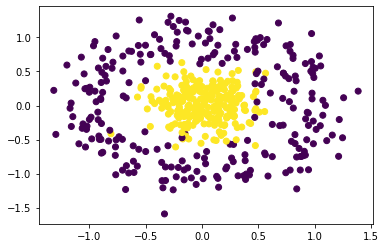

In [26]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

# Training the Network


In [0]:
model= NeuralNetwork(input_size=2,layer=[10,5],output_size=2) #2 classes in output, 2 features in input

In [0]:
def train(X,Y,model,max_epochs=500,learning_rate=0.001,logs=True):
  #logs if set will print the loss as the training takes place
  training_loss=[]
  classes=2
  Y_OHT= one_hot(Y,classes) #converting the output vector into one hot form
  #print("One hot shape=",Y_OHT.shape)

  for ix in range(max_epochs):
    Y_=model.forward(X) #current prediction
    l=loss(Y_OHT,Y_)
    training_loss.append(l)
    model.backward(X,Y_OHT,learning_rate)

    if(logs):
      print("Epoch %d Loss %.4f"%(ix,l))
  return training_loss

In [29]:
losses=train(X,Y,model)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

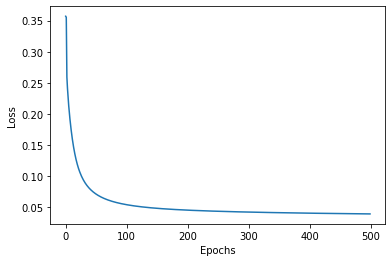

In [30]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()